In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

In [23]:
dfLiwc = pd.read_csv('data/camoes_liwc.csv', index_col=0,sep=";")

In [24]:
dfTags = pd.read_csv('data/camoes_postagger.csv', index_col=0)

In [25]:
dfUdep = pd.read_csv('data/camoes_udep.csv', index_col=0,sep=";")

In [26]:
dfUdep

,titulo,autor,ano,genero,ADVCL,ADVMOD,AMOD,APPOS,AUX,CASE,...,PARATAXIS,POBJ,POSS,PRECONJ,PREDET,PUNCT,ROOT,S,SJ,XCOMP
id,,,,,,,,,,,,,,,,,,,,,
1,A virtude laureada,Manoel Maria de Barbosa du Bocage,1805,Drama,21,259,569,8,3,591,...,204,174,92,1,0,300,227,0,0,26
2,Os Pobres,Raul Brandão,1906,Novel,35,411,525,2,19,672,...,235,236,74,2,1,740,506,0,0,61
3,Raios de extincta luz,Antero de Quental,1892,Poetry,41,351,548,5,7,749,...,172,315,80,4,0,544,368,0,0,45
4,Dispersão,Mário Sá-Carneiro,1914,Poetry,49,418,416,15,3,610,...,259,209,81,6,0,727,546,0,0,46
5,Cantos Sagrados,Manuel de Arriaga,1899,Poetry,24,272,643,5,10,870,...,130,364,128,1,0,324,253,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Auto da Índia,Gil Vicente,1509,Drama,27,431,497,5,5,367,...,186,120,66,0,0,638,564,0,0,48
192,Farsa de Inês Pereira,Gil Vicente,1523,Drama,48,517,426,6,28,424,...,195,113,64,1,1,616,508,0,0,87
193,A Cidade e a Infância,Luandino Vieira,1960,Tale,40,448,460,10,21,1013,...,139,449,70,0,2,739,664,0,0,48


In [27]:
dfUdep.iloc[:,4:]

,ADVCL,ADVMOD,AMOD,APPOS,AUX,CASE,CC,CCOMP,COMP,CONJ,...,PARATAXIS,POBJ,POSS,PRECONJ,PREDET,PUNCT,ROOT,S,SJ,XCOMP
id,,,,,,,,,,,,,,,,,,,,,
1,21,259,569,8,3,591,316,27,0,18,...,204,174,92,1,0,300,227,0,0,26
2,35,411,525,2,19,672,483,76,1,26,...,235,236,74,2,1,740,506,0,0,61
3,41,351,548,5,7,749,370,50,0,30,...,172,315,80,4,0,544,368,0,0,45
4,49,418,416,15,3,610,433,67,0,17,...,259,209,81,6,0,727,546,0,0,46
5,24,272,643,5,10,870,359,53,0,32,...,130,364,128,1,0,324,253,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,27,431,497,5,5,367,314,53,0,27,...,186,120,66,0,0,638,564,0,0,48
192,48,517,426,6,28,424,373,78,1,60,...,195,113,64,1,1,616,508,0,0,87
193,40,448,460,10,21,1013,345,68,0,16,...,139,449,70,0,2,739,664,0,0,48


In [28]:
dfTags.iloc[:,3:]

,ADJ,ADV,CARD,CJ,CL,CN,DA,DEM,DFR,DGT,...,PREPDEM,PRS,QNT,REL,STT,SYB,UM,V,VAUX,WD
1,579,292,17,312,213,1434,1089,25,0,44,...,0,73,32,156,12,0,2,779,0,0
2,466,422,12,498,317,1598,967,58,0,3,...,0,93,72,191,2,0,169,1078,8,0
3,530,394,18,497,214,1601,995,95,0,69,...,0,55,61,191,14,13,131,865,3,0
4,338,450,3,476,357,1565,552,28,0,28,...,0,207,70,140,6,0,127,1060,0,6
5,647,276,19,506,163,1741,1258,76,0,29,...,0,89,63,213,5,9,99,679,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,504,541,68,421,327,1321,367,159,0,307,...,0,230,59,233,5,0,25,1170,2,8
192,337,622,14,528,322,1105,374,125,0,419,...,0,249,46,191,7,0,14,1167,2,0
193,411,514,21,478,232,1745,1234,67,0,20,...,0,211,63,126,4,0,107,1029,6,4
194,338,455,41,391,150,2008,1132,76,0,10,...,0,161,46,162,6,3,89,904,18,0


In [29]:
dfLiwc

,titulo,autor,ano,genero,achieve,adverb,affect,anger,anx,article,...,social,space,swear,tentat,they,time,verb,we,work,you
id,,,,,,,,,,,,,,,,,,,,,
1,A virtude laureada,Manoel Maria de Barbosa du Bocage,1805,Drama,70,67,663,100,84,554,...,1126,600,140,303,161,143,258,3,50,722
2,Os Pobres,Raul Brandão,1906,Novel,74,177,603,99,63,789,...,1409,819,269,623,189,323,667,3,53,763
3,Raios de extincta luz,Antero de Quental,1892,Poetry,91,152,596,75,44,636,...,1156,743,232,471,143,261,496,3,73,650
4,Dispersão,Mário Sá-Carneiro,1914,Poetry,113,131,538,70,64,366,...,759,590,145,349,99,250,456,0,35,325
5,Cantos Sagrados,Manuel de Arriaga,1899,Poetry,90,149,568,58,30,684,...,1235,916,214,433,187,269,402,14,90,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Auto da Índia,Gil Vicente,1509,Drama,112,207,465,114,27,199,...,1048,404,173,356,29,210,801,5,8,388
192,Farsa de Inês Pereira,Gil Vicente,1523,Drama,82,185,500,80,20,254,...,1220,346,230,354,54,177,691,2,63,465
193,A Cidade e a Infância,Luandino Vieira,1960,Tale,114,208,549,71,49,674,...,1386,906,334,397,206,530,733,4,123,719


In [30]:
dfLiwc.iloc[:,0:4]

,titulo,autor,ano,genero
id,,,,
1,A virtude laureada,Manoel Maria de Barbosa du Bocage,1805,Drama
2,Os Pobres,Raul Brandão,1906,Novel
3,Raios de extincta luz,Antero de Quental,1892,Poetry
4,Dispersão,Mário Sá-Carneiro,1914,Poetry
5,Cantos Sagrados,Manuel de Arriaga,1899,Poetry
...,...,...,...,...
191,Auto da Índia,Gil Vicente,1509,Drama
192,Farsa de Inês Pereira,Gil Vicente,1523,Drama
193,A Cidade e a Infância,Luandino Vieira,1960,Tale


In [31]:
dfLiwc.iloc[:,4:]

,achieve,adverb,affect,anger,anx,article,assent,auxverb,bio,body,...,social,space,swear,tentat,they,time,verb,we,work,you
id,,,,,,,,,,,,,,,,,,,,,
1,70,67,663,100,84,554,63,70,282,142,...,1126,600,140,303,161,143,258,3,50,722
2,74,177,603,99,63,789,33,252,482,193,...,1409,819,269,623,189,323,667,3,53,763
3,91,152,596,75,44,636,22,177,360,145,...,1156,743,232,471,143,261,496,3,73,650
4,113,131,538,70,64,366,15,218,334,169,...,759,590,145,349,99,250,456,0,35,325
5,90,149,568,58,30,684,30,145,305,125,...,1235,916,214,433,187,269,402,14,90,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,112,207,465,114,27,199,48,293,263,96,...,1048,404,173,356,29,210,801,5,8,388
192,82,185,500,80,20,254,53,229,272,114,...,1220,346,230,354,54,177,691,2,63,465
193,114,208,549,71,49,674,11,238,478,234,...,1386,906,334,397,206,530,733,4,123,719


In [32]:
df1 = pd.concat([dfLiwc.iloc[:,0:4], dfLiwc.iloc[:,4:].add_prefix('liwc:'), dfTags.iloc[:,3:].add_prefix('postagger:'), dfUdep.iloc[:,4:].add_prefix('ud:')], axis=1)
df1

,titulo,autor,ano,genero,liwc:achieve,liwc:adverb,liwc:affect,liwc:anger,liwc:anx,liwc:article,...,ud:PARATAXIS,ud:POBJ,ud:POSS,ud:PRECONJ,ud:PREDET,ud:PUNCT,ud:ROOT,ud:S,ud:SJ,ud:XCOMP
1,A virtude laureada,Manoel Maria de Barbosa du Bocage,1805,Drama,70,67,663,100,84,554,...,204,174,92,1,0,300,227,0,0,26
2,Os Pobres,Raul Brandão,1906,Novel,74,177,603,99,63,789,...,235,236,74,2,1,740,506,0,0,61
3,Raios de extincta luz,Antero de Quental,1892,Poetry,91,152,596,75,44,636,...,172,315,80,4,0,544,368,0,0,45
4,Dispersão,Mário Sá-Carneiro,1914,Poetry,113,131,538,70,64,366,...,259,209,81,6,0,727,546,0,0,46
5,Cantos Sagrados,Manuel de Arriaga,1899,Poetry,90,149,568,58,30,684,...,130,364,128,1,0,324,253,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Auto da Índia,Gil Vicente,1509,Drama,112,207,465,114,27,199,...,186,120,66,0,0,638,564,0,0,48
192,Farsa de Inês Pereira,Gil Vicente,1523,Drama,82,185,500,80,20,254,...,195,113,64,1,1,616,508,0,0,87
193,A Cidade e a Infância,Luandino Vieira,1960,Tale,114,208,549,71,49,674,...,139,449,70,0,2,739,664,0,0,48
194,KAPAPA,JOSÉ LUANDINO VIEIRA,1998,Novel,107,198,529,74,40,594,...,244,447,208,1,1,335,245,0,0,64


In [33]:
y = df1.iloc[:,3].values

In [34]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 14)
('Drama', 9)
('Essay', 8)
('Poem', 3)
('Other', 1)
('Anthology', 1)
('Narrative', 1)
('Letter', 1)
('Memoirs', 1)
('Script', 1)
('Allegory', 1)


## Filtrando dados

In [35]:
df = df1[df1.genero.isin(["Tale", "Novel", "Short story", "Chronicle", "Poetry"])]

In [36]:
X = df.iloc[:,4:].values
y = df.iloc[:,3].values

In [37]:
X

array([[ 74, 177, 603, ...,   0,   0,  61],
       [ 91, 152, 596, ...,   0,   0,  45],
       [113, 131, 538, ...,   0,   0,  46],
       ...,
       [155, 330, 672, ...,   0,   0,  47],
       [114, 208, 549, ...,   0,   0,  48],
       [107, 198, 529, ...,   0,   0,  64]])

In [38]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 14)


In [39]:
# features names
fn = list(df.columns[4:])
print(len(fn))
print(fn)

178
['liwc:achieve', 'liwc:adverb', 'liwc:affect', 'liwc:anger', 'liwc:anx', 'liwc:article', 'liwc:assent', 'liwc:auxverb', 'liwc:bio', 'liwc:body', 'liwc:cause', 'liwc:certain', 'liwc:cogmech', 'liwc:conj', 'liwc:death', 'liwc:discrep', 'liwc:excl', 'liwc:family', 'liwc:feel', 'liwc:filler', 'liwc:friend', 'liwc:funct', 'liwc:future', 'liwc:health', 'liwc:hear', 'liwc:home', 'liwc:humans', 'liwc:i', 'liwc:incl', 'liwc:ingest', 'liwc:inhib', 'liwc:insight', 'liwc:ipron', 'liwc:leisure', 'liwc:money', 'liwc:motion', 'liwc:negate', 'liwc:negemo', 'liwc:nonfl', 'liwc:number', 'liwc:past', 'liwc:percept', 'liwc:posemo', 'liwc:ppron', 'liwc:preps', 'liwc:present', 'liwc:pronoun', 'liwc:quant', 'liwc:relativ', 'liwc:relig', 'liwc:sad', 'liwc:see', 'liwc:sexual', 'liwc:shehe', 'liwc:social', 'liwc:space', 'liwc:swear', 'liwc:tentat', 'liwc:they', 'liwc:time', 'liwc:verb', 'liwc:we', 'liwc:work', 'liwc:you', 'postagger:ADJ', 'postagger:ADV', 'postagger:CARD', 'postagger:CJ', 'postagger:CL', 'p

In [40]:
# class names
cn = []
for x in y:
  if x not in cn:
    cn.append(x)
print(cn)

['Novel', 'Poetry', 'Tale', 'Chronicle', 'Short story']


## Machine Learning: Random Forests

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Chronicle       1.00      0.33      0.50         3
       Novel       0.33      0.20      0.25         5
      Poetry       0.50      0.67      0.57         3
 Short story       0.00      0.00      0.00         4
        Tale       0.69      0.95      0.80        19

    accuracy                           0.65        34
   macro avg       0.51      0.43      0.42        34
weighted avg       0.57      0.65      0.58        34



/dados/usuarios/mateus/projetos/camões/camoes/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/dados/usuarios/mateus/projetos/camões/camoes/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/dados/usuarios/mateus/projetos/camões/camoes/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

## Random Forests Hyperparameter tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [43]:
le = preprocessing.LabelEncoder()
rf = RandomForestClassifier(random_state = 42)

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              }
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [45]:
rf_random = GridSearchCV(
    estimator = rf, 
    param_grid = random_grid, 
    cv = 3, 
    verbose=1, 
    n_jobs = -1,
    scoring='f1_weighted'
)

In [46]:
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             scoring='f1_weighted', verbose=1)

In [47]:
rf_random.best_score_

0.5981214154722292

In [48]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [49]:
print('aa')

aa


### Using best parameters

In [50]:
classifier = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=600, 
    random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

   Chronicle       1.00      0.33      0.50         3
       Novel       0.50      0.20      0.29         5
      Poetry       0.50      0.67      0.57         3
 Short story       1.00      0.00      0.00         4
        Tale       0.67      0.95      0.78        19

    accuracy                           0.65        34
   macro avg       0.73      0.43      0.43        34
weighted avg       0.70      0.65      0.57        34



In [51]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import statistics

In [52]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [53]:
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [55]:
import eli5

In [58]:
fold = 1
results = []
explanations = []
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print("fold: ",fold)
    fold = fold + 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=1))
    results.append(classification_report(y_test, y_pred, zero_division=1,output_dict=True))
    
    explanation = eli5.sklearn.explain_prediction.explain_prediction_tree_classifier(
        classifier,
        X[0], 
        top=X.shape[0],
        feature_names=fn
    )
    expDf = eli5.formatters.as_dataframe.format_as_dataframe(explanation)
    explanations.append(expDf)    

fold:  1
              precision    recall  f1-score   support

   Chronicle       1.00      0.00      0.00         3
       Novel       0.00      0.00      0.00         5
      Poetry       0.75      1.00      0.86         3
 Short story       1.00      0.75      0.86         4
        Tale       0.71      0.89      0.79        19

    accuracy                           0.68        34
   macro avg       0.69      0.53      0.50        34
weighted avg       0.67      0.68      0.62        34

fold:  2
              precision    recall  f1-score   support

   Chronicle       1.00      0.00      0.00         3
       Novel       0.50      0.20      0.29         5
      Poetry       0.60      1.00      0.75         3
 Short story       0.67      0.50      0.57         4
        Tale       0.75      0.95      0.84        19

    accuracy                           0.71        34
   macro avg       0.70      0.53      0.49        34
weighted avg       0.71      0.71      0.64        34

fold

In [59]:
resultsDict = {
    'Chronicle'   : {'precision' : [], 'recall' : [], 'f1-score' : [], 'support' : []},
    'Novel'       : {'precision' : [], 'recall' : [], 'f1-score' : [], 'support' : []},
    'Poetry'      : {'precision' : [], 'recall' : [], 'f1-score' : [], 'support' : []},
    'Short story' : {'precision' : [], 'recall' : [], 'f1-score' : [], 'support' : []},
    'Tale'        : {'precision' : [], 'recall' : [], 'f1-score' : [], 'support' : []}
}
for res in results:
    for className in cn:
        print(className)
        print(res[className])
        for r in res[className]:
            #print(r,res[className][r])
            resultsDict[className][r].append(res[className][r])
    #for r in res:
    #print(res)

Novel
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5}
Poetry
{'precision': 0.75, 'recall': 1.0, 'f1-score': 0.8571428571428571, 'support': 3}
Tale
{'precision': 0.7083333333333334, 'recall': 0.8947368421052632, 'f1-score': 0.7906976744186046, 'support': 19}
Chronicle
{'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}
Short story
{'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 4}
Novel
{'precision': 0.5, 'recall': 0.2, 'f1-score': 0.28571428571428575, 'support': 5}
Poetry
{'precision': 0.6, 'recall': 1.0, 'f1-score': 0.7499999999999999, 'support': 3}
Tale
{'precision': 0.75, 'recall': 0.9473684210526315, 'f1-score': 0.8372093023255814, 'support': 19}
Chronicle
{'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}
Short story
{'precision': 0.6666666666666666, 'recall': 0.5, 'f1-score': 0.5714285714285715, 'support': 4}
Novel
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5}
Poetry
{'precision': 1.0, 'r

In [60]:
for r in resultsDict:
    print(r)
    for metrica in resultsDict[r]:
        if metrica == 'support': continue
        #if metrica == 'f1-score': continue
        print("\t",metrica)
        #print(resultsDict[r][metrica])
        print("\t\tmedia: %0.2f desvio %0.2f" % (statistics.mean(resultsDict[r][metrica]), statistics.stdev(resultsDict[r][metrica])))

Chronicle
	 precision
		media: 1.00 desvio 0.00
	 recall
		media: 0.18 desvio 0.29
	 f1-score
		media: 0.24 desvio 0.36
Novel
	 precision
		media: 0.40 desvio 0.42
	 recall
		media: 0.08 desvio 0.11
	 f1-score
		media: 0.11 desvio 0.16
Poetry
	 precision
		media: 0.87 desvio 0.19
	 recall
		media: 0.93 desvio 0.15
	 f1-score
		media: 0.88 desvio 0.11
Short story
	 precision
		media: 0.73 desvio 0.43
	 recall
		media: 0.30 desvio 0.33
	 f1-score
		media: 0.37 desvio 0.37
Tale
	 precision
		media: 0.66 desvio 0.08
	 recall
		media: 0.92 desvio 0.06
	 f1-score
		media: 0.77 desvio 0.07


In [61]:
scores = cross_validate(classifier, X, y, cv=5, scoring=['f1_micro', 'precision_micro', 'recall_micro','f1_macro', 'precision_macro', 'recall_macro','f1_weighted', 'precision_weighted', 'recall_weighted'])

/dados/usuarios/mateus/projetos/camões/camoes/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/dados/usuarios/mateus/projetos/camões/camoes/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/dados/usuarios/mateus/projetos/camões/camoes/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

In [62]:
print(scores)

{'fit_time': array([1.3047657 , 1.11659598, 1.08881259, 1.11949849, 1.0999918 ]), 'score_time': array([0.09811664, 0.09342551, 0.09188604, 0.10735369, 0.09310365]), 'test_f1_micro': array([0.67647059, 0.70588235, 0.52941176, 0.72727273, 0.63636364]), 'test_precision_micro': array([0.67647059, 0.70588235, 0.52941176, 0.72727273, 0.63636364]), 'test_recall_micro': array([0.67647059, 0.70588235, 0.52941176, 0.72727273, 0.63636364]), 'test_f1_macro': array([0.50099668, 0.48887043, 0.37043478, 0.65528239, 0.352     ]), 'test_precision_macro': array([0.49166667, 0.50333333, 0.50714286, 0.836     , 0.32258065]), 'test_recall_macro': array([0.52894737, 0.52947368, 0.35      , 0.61222222, 0.4       ]), 'test_f1_weighted': array([0.61833105, 0.64327243, 0.4629156 , 0.6867009 , 0.49818182]), 'test_precision_weighted': array([0.57965686, 0.62401961, 0.4894958 , 0.74969697, 0.41348974]), 'test_recall_weighted': array([0.67647059, 0.70588235, 0.52941176, 0.72727273, 0.63636364])}


In [63]:
print("%0.2f f1 micro desvio: %0.2f" % (scores['test_f1_micro'].mean(), scores['test_f1_micro'].std()))
print("%0.2f prec micro desvio: %0.2f" % (scores['test_precision_micro'].mean(), scores['test_precision_micro'].std()))
print("%0.2f rec micro desvio: %0.2f" % (scores['test_recall_micro'].mean(), scores['test_recall_micro'].std()))

0.66 f1 micro desvio: 0.07
0.66 prec micro desvio: 0.07
0.66 rec micro desvio: 0.07


In [64]:
print("%0.2f f1 macro desvio: %0.2f" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))
print("%0.2f prec macro desvio: %0.2f" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std()))
print("%0.2f rec macro desvio: %0.2f" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std()))

0.47 f1 macro desvio: 0.11
0.53 prec macro desvio: 0.17
0.48 rec macro desvio: 0.10


In [65]:
print("%0.2f f1 weighted desvio: %0.2f" % (scores['test_f1_weighted'].mean(), scores['test_f1_weighted'].std()))
print("%0.2f prec weighted desvio: %0.2f" % (scores['test_precision_weighted'].mean(), scores['test_precision_weighted'].std()))
print("%0.2f rec weighted desvio: %0.2f" % (scores['test_recall_weighted'].mean(), scores['test_recall_weighted'].std()))

0.58 f1 weighted desvio: 0.09
0.57 prec weighted desvio: 0.12
0.66 rec weighted desvio: 0.07


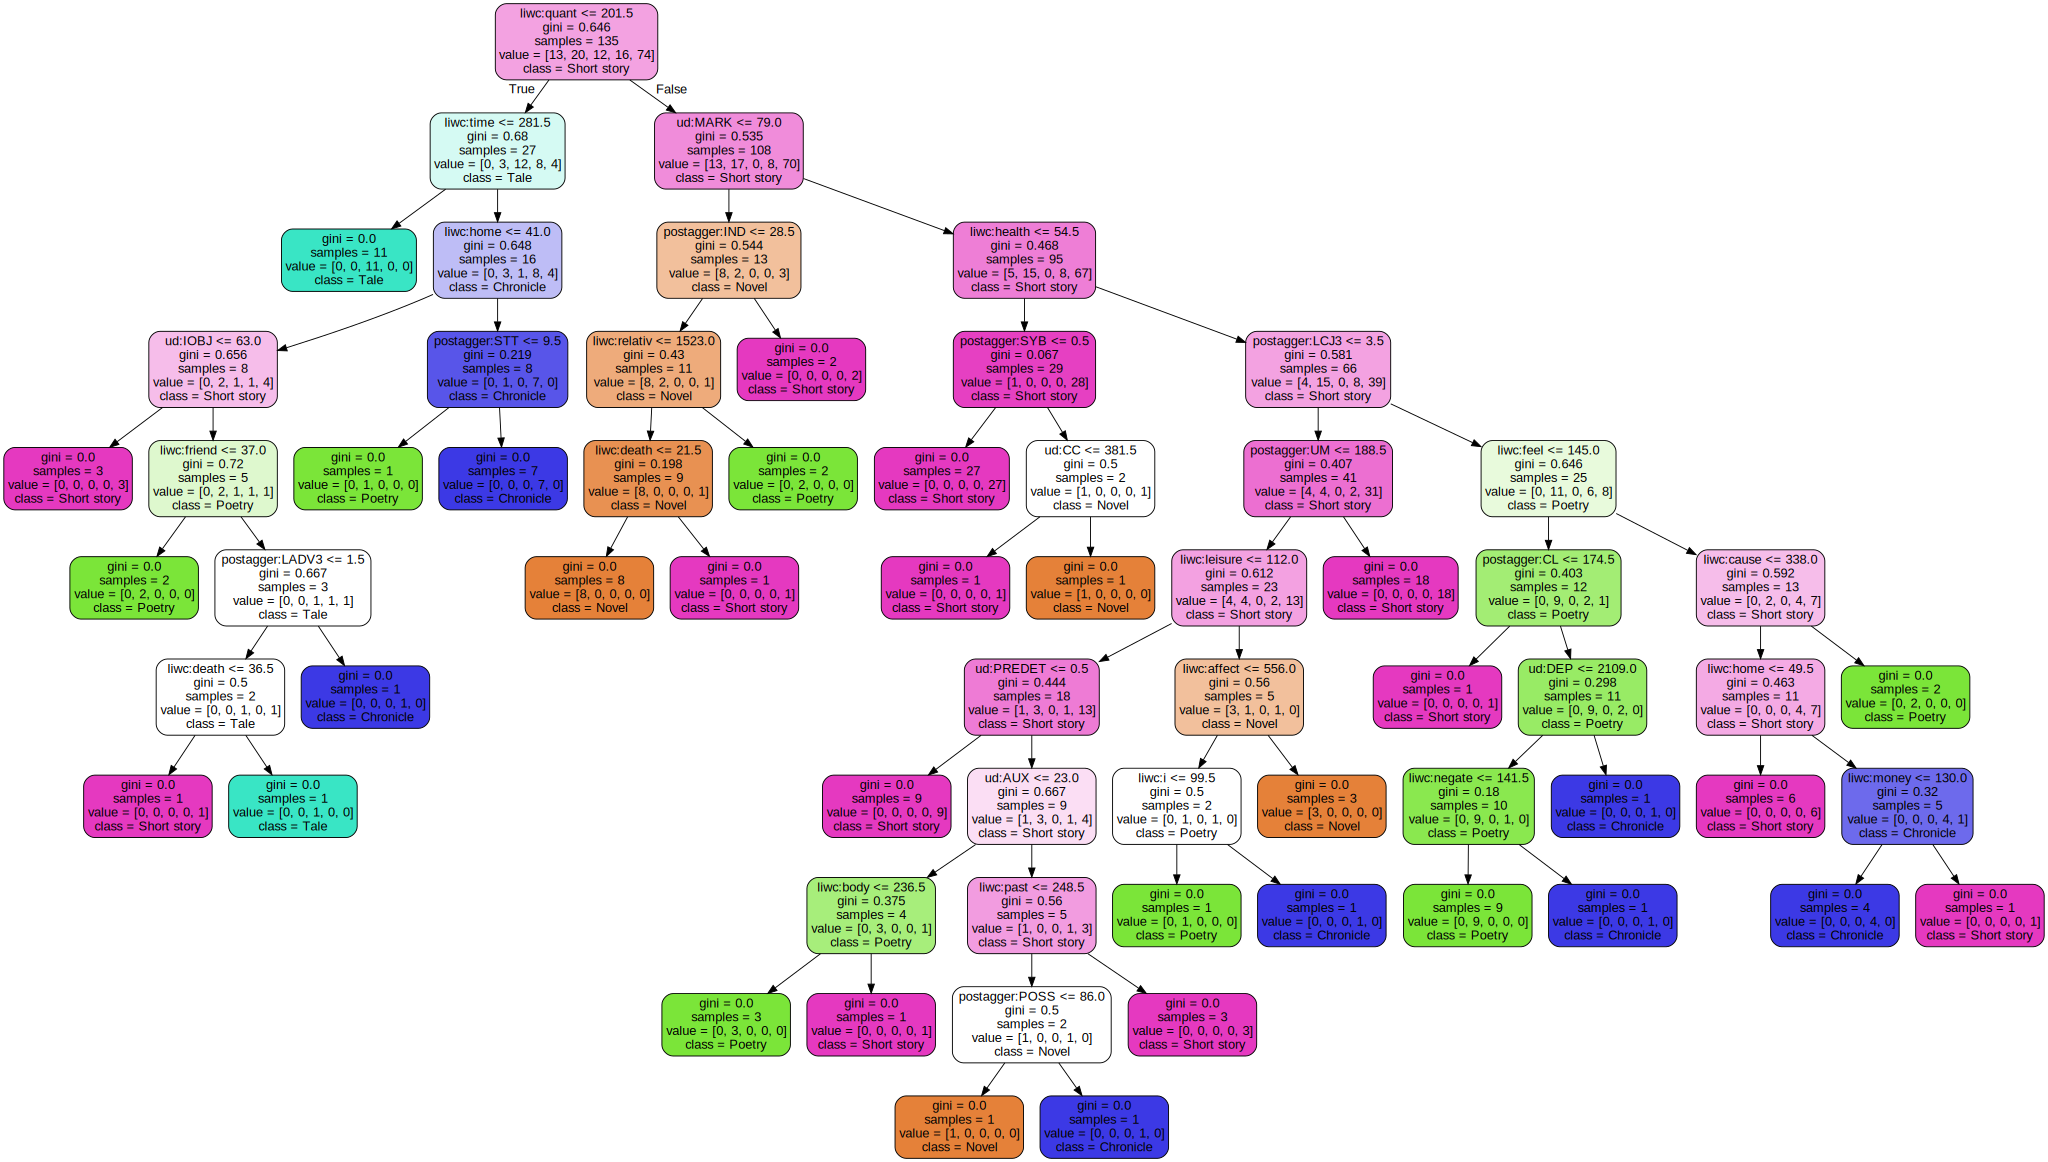

In [66]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier.estimators_[0], 
                           feature_names=fn,
                           class_names=cn, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

<AxesSubplot:xlabel='Features'>

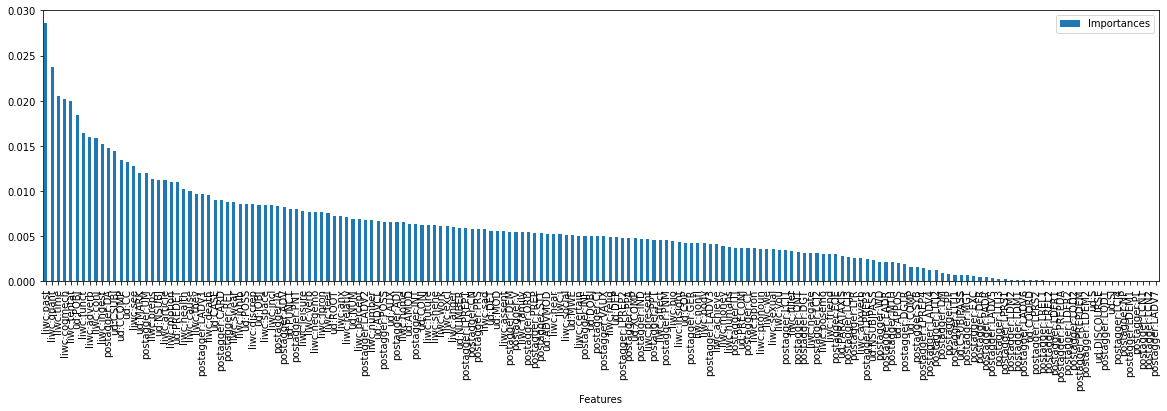

In [67]:
importances = classifier.feature_importances_
final_df = pd.DataFrame({"Features": fn, "Importances":importances})
#final_df.set_index('Importances')
final_df = final_df.sort_values(by=['Importances'], ascending=False)
final_df.plot(x ='Features', y='Importances', kind = 'bar', figsize=(20,5))

In [68]:
eli5.show_weights(classifier, top=10,
                  target_names=cn,
                  feature_names=fn)

Weight,Feature
0.0287 ± 0.0837,liwc:past
0.0237 ± 0.0752,liwc:quant
0.0205 ± 0.0928,liwc:time
0.0202 ± 0.0910,liwc:cogmech
0.0200 ± 0.0886,liwc:tentat
0.0184 ± 0.0620,ud:POBJ
0.0164 ± 0.0766,liwc:funct
0.0160 ± 0.0737,liwc:adverb
0.0159 ± 0.0552,liwc:conj
0.0153 ± 0.0582,liwc:ingest


In [69]:
import eli5
eli5.sklearn.explain_prediction.explain_prediction_tree_classifier(
    classifier,
    X[0], 
    top=10,
    feature_names=fn
)

Explanation(estimator='RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=600,\n                       random_state=42)', description='\nFeatures with largest coefficients per class.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Chronicle', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.09629629629629526, std=None, value=1.0), FeatureWeight(feature='liwc:past', weight=0.017936228593620453, std=None, value=157.0), FeatureWeight(feature='ud:CC', weight=0.006169535553931137, std=None, value=483.0), FeatureWeight(feature='liwc:quant', weight=0.005912095830622563, std=None, value=265.0)], neg=[FeatureWeight(feature='ud:POBJ', weight=-0.009050025991518008, std=None, value=236.0), FeatureWeight(feature='ud:NSUBJ', weight=-0.006986873661146146, std=None, value=548.0), FeatureWeight(feature='ud:CASE', weight=-0.006821845512485586, std=None, value=672.0), FeatureWeight(feature='ud:MARK', weight=-0.006498727023159155, std=None, value=115.0), FeatureWeight(feature='liwc:negemo', weight=-0.006097753617612374, std=None, value=319.0), FeatureWeight(feature='postagger:DA', weight=-0.005508647527815461, std=None, value=967.0)], pos_remaining=46, neg_remaining=95), proba=0.0015297619047619044, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Novel', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.14814814814814845, std=None, value=1.0), FeatureWeight(feature='ud:NSUBJ', weight=0.03192182475120628, std=None, value=548.0), FeatureWeight(feature='liwc:time', weight=0.029807437247484685, std=None, value=323.0), FeatureWeight(feature='liwc:past', weight=0.019292979825757357, std=None, value=157.0), FeatureWeight(feature='postagger:LITJ2', weight=0.018059898734194543, std=None, value=2.0), FeatureWeight(feature='liwc:negemo', weight=0.016385170580682333, std=None, value=319.0), FeatureWeight(feature='postagger:PREP', weight=0.01627955830878257, std=None, value=813.0), FeatureWeight(feature='ud:CSUBJ', weight=0.015972818953905937, std=None, value=2.0), FeatureWeight(feature='liwc:see', weight=0.01581594372952997, std=None, value=101.0), FeatureWeight(feature='ud:CC', weight=0.015780415784104187, std=None, value=483.0)], neg=[], pos_remaining=137, neg_remaining=9), proba=0.988678011803012, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Poetry', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.08888888888888861, std=None, value=1.0), FeatureWeight(feature='liwc:past', weight=0.02808391094362742, std=None, value=157.0), FeatureWeight(feature='liwc:time', weight=0.014097299088906237, std=None, value=323.0)], neg=[FeatureWeight(feature='liwc:cogmech', weight=-0.013907041268877594, std=None, value=2209.0), FeatureWeight(feature='liwc:tentat', weight=-0.012027496004244265, std=None, value=623.0), FeatureWeight(fea

In [70]:
import eli5
eli5.sklearn.explain_prediction.explain_prediction_tree_classifier(
    classifier,
    X[0], 
    top=X.shape[0],
    feature_names=fn
)

Explanation(estimator='RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=600,\n                       random_state=42)', description='\nFeatures with largest coefficients per class.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Chronicle', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.09629629629629526, std=None, value=1.0), FeatureWeight(feature='liwc:past', weight=0.017936228593620453, std=None, value=157.0), FeatureWeight(feature='ud:CC', weight=0.006169535553931137, std=None, value=483.0), FeatureWeight(feature='liwc:quant', weight=0.005912095830622563, std=None, value=265.0), FeatureWeight(feature='liwc:assent', weight=0.005127147820166799, std=None, value=33.0), FeatureWeight(feature='liwc:tentat', weight=0.0038749687420135005, std=None, value=623.0), FeatureWeight(feature='postagger:ADV', weight=0.003183190253734647, std=None, value=422.0), FeatureWeight(feature='liwc:conj', weight=0.0024858595691316923, std=None, value=744.0), FeatureWeight(feature='liwc:present', weight=0.002378333512131492, std=None, value=450.0), FeatureWeight(feature='liwc:ingest', weight=0.0023570062509945785, std=None, value=325.0), FeatureWeight(feature='postagger:PPA', weight=0.0019941343342276294, std=None, value=230.0), FeatureWeight(feature='liwc:cogmech', weight=0.0017995039307740813, std=None, value=2209.0), FeatureWeight(feature='liwc:article', weight=0.0017176398643881604, std=None, value=789.0), FeatureWeight(feature='liwc:funct', weight=0.0016903625339919006, std=None, value=2980.0), FeatureWeight(feature='postagger:LADV1', weight=0.0016592924432492955, std=None, value=11.0), FeatureWeight(feature='liwc:nonfl', weight=0.0014042328042328043, std=None, value=291.0), FeatureWeight(feature='liwc:they', weight=0.0012256490763674739, std=None, value=189.0), FeatureWeight(feature='liwc:swear', weight=0.0012183029368634528, std=None, value=269.0), FeatureWeight(feature='ud:CSUBJ', weight=0.001164759280187064, std=None, value=2.0), FeatureWeight(feature='liwc:cause', weight=0.0010450925255390165, std=None, value=198.0), FeatureWeight(feature='postagger:UM', weight=0.0009537214947812503, std=None, value=169.0), FeatureWeight(feature='ud:AUX', weight=0.0007430304345922236, std=None, value=19.0), FeatureWeight(feature='ud:MOD', weight=0.000697698447267804, std=None, value=527.0), FeatureWeight(feature='liwc:family', weight=0.0006251476926323474, std=None, value=21.0), FeatureWeight(feature='ud:PREDET', weight=0.0006095444552268387, std=None, value=1.0), FeatureWeight(feature='liwc:future', weight=0.0005924642680142791, std=None, value=16.0), FeatureWeight(feature='liwc:you', weight=0.0005542677116876081, std=None, value=763.0), FeatureWeight(feature='ud:PRECONJ', weight=0.0005395221145321478, std=None, value=2.0), FeatureWeight(feature='postagger:LCJ3', weight=0.0005291764571154811, std=None, value=2.0), Fea

In [71]:
explanation = eli5.sklearn.explain_prediction.explain_prediction_tree_classifier(
    classifier,
    X[0], 
    top=X.shape[0],
    feature_names=fn
)
expDf = format_as_dataframe(explanation)

NameError: name 'format_as_dataframe' is not defined

In [ ]:
expDf

In [ ]:
print("a")

In [72]:
from eli5.formatters import format_as_dataframe

In [73]:
explanations

[        target        feature    weight  value
 0    Chronicle         <BIAS>  0.097015    1.0
 1    Chronicle      liwc:past  0.044279  157.0
 2    Chronicle  postagger:LTR  0.026741   58.0
 3    Chronicle    liwc:assent  0.020427   33.0
 4    Chronicle   liwc:percept  0.008787  356.0
 ..         ...            ...       ...    ...
 740       Tale   liwc:percept -0.022304  356.0
 741       Tale    liwc:assent -0.029123   33.0
 742       Tale  postagger:LTR -0.035981   58.0
 743       Tale      liwc:time -0.060517  323.0
 744       Tale      liwc:past -0.075718  157.0
 
 [745 rows x 4 columns],
         target      feature    weight  value
 0    Chronicle       <BIAS>  0.097015    1.0
 1    Chronicle   liwc:quant  0.011766  265.0
 2    Chronicle  liwc:assent  0.011176   33.0
 3    Chronicle     liwc:see  0.005874  101.0
 4    Chronicle  liwc:ingest  0.005484  325.0
 ..         ...          ...       ...    ...
 741       Tale   liwc:preps -0.024193  917.0
 742       Tale     liwc:see 

In [74]:
df2 = expDf.groupby(['target','feature']).mean()

In [75]:
df2

weight  value
target    feature                      
Chronicle <BIAS>        0.096296    1.0
          liwc:achieve -0.001614   74.0
          liwc:adverb   0.000263  177.0
          liwc:affect  -0.000882  603.0
          liwc:anger   -0.002933   99.0
...                          ...    ...
Tale      ud:PRECONJ   -0.003337    2.0
          ud:PREDET    -0.014113    1.0
          ud:PUNCT      0.012770  740.0
          ud:ROOT       0.016361  506.0
          ud:XCOMP     -0.001915   61.0

[763 rows x 2 columns]

In [76]:
avgExp = {}
for c in cn:
    avgExp[c] = {'<BIAS>': []}
    for f in fn:
        avgExp[c][f] = []   
#avgExp

In [77]:
for df in explanations:
    #dfAux = df.target.isin(["Chronicle"]).feature.isin(["liwc:achieve"])
    #print(df)
    for index, r in df.iterrows():
        #print(r)
        #print(df[r])
        #print(r[1])
        #print('tg',r['target'])
        #print('ft',r['feature'])
        #print('w',r['weight'])
        #print('---')
        avgExp[r['target']][r['feature']].append(r['weight'])
        #break

In [78]:
# 0.096296
aux = (0.09701492537313405+0.09701492537313405+0.08955223880596803+0.096296296296298+0.096296296296298)/5
print(aux)

print(statistics.mean(avgExp['Chronicle']['<BIAS>']))

0.09523493642896642
0.0952349364289667


In [79]:
explanations[0]

,target,feature,weight,value
0,Chronicle,<BIAS>,0.097015,1.0
1,Chronicle,liwc:past,0.044279,157.0
2,Chronicle,postagger:LTR,0.026741,58.0
3,Chronicle,liwc:assent,0.020427,33.0
4,Chronicle,liwc:percept,0.008787,356.0
...,...,...,...,...
740,Tale,liwc:percept,-0.022304,356.0
741,Tale,liwc:assent,-0.029123,33.0
742,Tale,postagger:LTR,-0.035981,58.0
743,Tale,liwc:time,-0.060517,323.0


In [106]:
len(explanations)

5

In [113]:
cn

['Novel', 'Poetry', 'Tale', 'Chronicle', 'Short story']

In [82]:
for c in cn:
    for i, f in enumerate(fn):
        #if len(avgExp[c][f]) == 5: continue
            
        for ii in range(len(avgExp[c][f]), 5):
            avgExp[c][f].append(0)
        
        print(c,';',f,';',
              str(statistics.mean(avgExp[c][f])).replace('.',','),';',
              str(statistics.stdev(avgExp[c][f])).replace('.',','))
        
        #if len(avgExp[c][f]) > 2:
            
        #elif len(avgExp[c][f]) == 0:
        #    print(c,';',f,';',';')
        #else:
        #    print(c,';',f,';',statistics.mean(avgExp[c][f]),';')
        #print(avgExp[c][f])
        #print()
        #if i > 5: break

Novel ; liwc:achieve ; 0,0028386858627011988 ; 0,0037283557662685395
Novel ; liwc:adverb ; 0,007724609654664378 ; 0,005574609179173087
Novel ; liwc:affect ; 0,0014800724413162332 ; 0,0026279688186709215
Novel ; liwc:anger ; 0,00416740145060453 ; 0,002594614132117849
Novel ; liwc:anx ; 0,002135278870114637 ; 0,002040108896752215
Novel ; liwc:article ; 0,0063302600560912695 ; 0,004036356741887438
Novel ; liwc:assent ; 0,012427444914468818 ; 0,008258106980628043
Novel ; liwc:auxverb ; 0,0034213915809010163 ; 0,002359681413256292
Novel ; liwc:bio ; -0,0005570889205641161 ; 0,006226612489124149
Novel ; liwc:body ; 0,005360449960293333 ; 0,0022448449297988965
Novel ; liwc:cause ; 0,004284886286728459 ; 0,006574080311004695
Novel ; liwc:certain ; 0,0033720155957645296 ; 0,002343721636150162
Novel ; liwc:cogmech ; 0,004497209023712477 ; 0,004334739058546463
Novel ; liwc:conj ; 0,00910955936104271 ; 0,0062468577448482705
Novel ; liwc:death ; 0,008146676743549418 ; 0,004142366342810952
Novel ; l

In [80]:
print('a')

a
